In [85]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [93]:
img_height = 224
img_width = 224
input_shape = (img_width, img_height, 3)
batch_size = 8
train_dir = pathlib.Path('D:/Thesis_data/color_training_img')
test_dir  = pathlib.Path('D:/Thesis_data/color_testing_img')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/cacao_CNN/weight/')
model_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.h5')
model_plot_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.png')
classes = ['Brown', 'Others', 'Partially Purple', 'Purple', 'Slaty', 'White']

In [94]:
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    color_mode="grayscale",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# 
test_ds = test_ds.prefetch(1)

Found 6048 files belonging to 6 classes.


In [88]:
for img,lab in test_ds.take(1):
    print(np.shape(img))

(8, 224, 224, 1)


In [97]:
# edge_detect = np.array([[
#     [-1, -1, -1],
#     [-1, 8, -1],
#     [-1, -1, -1]
# ]])
edge_detect = np.array([[
    [-1, -1, -1,-1, 8, -1,-1, -1, -1]
]], dtype=np.float32)

edge_detect = np.multiply(edge_detect, 0.125)
tsed = tf.Variable(tf.constant(edge_detect, shape=[3, 3, 1, 1]))

input_layer = layers.Input(shape=input_shape)
# # # contrast = tf.image.adjust_contrast(input_layer, 2)
# # # satu = tf.image.adjust_saturation(input_layer, 1.5)
# # # bri = tf.image.adjust_brightness(input_layer,12)
# edge = tf.nn.conv2d(input_layer,tsed, strides=[1, 1, 1, 1], padding='VALID')
# model = keras.Model(input_layer, edge)
# model.summary()
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# print(tsed)


<tf.Variable 'Variable:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
array([[[[-0.125]],

        [[-0.125]],

        [[-0.125]]],


       [[[-0.125]],

        [[ 1.   ]],

        [[-0.125]]],


       [[[-0.125]],

        [[-0.125]],

        [[-0.125]]]], dtype=float32)>


(8, 224, 224, 1)


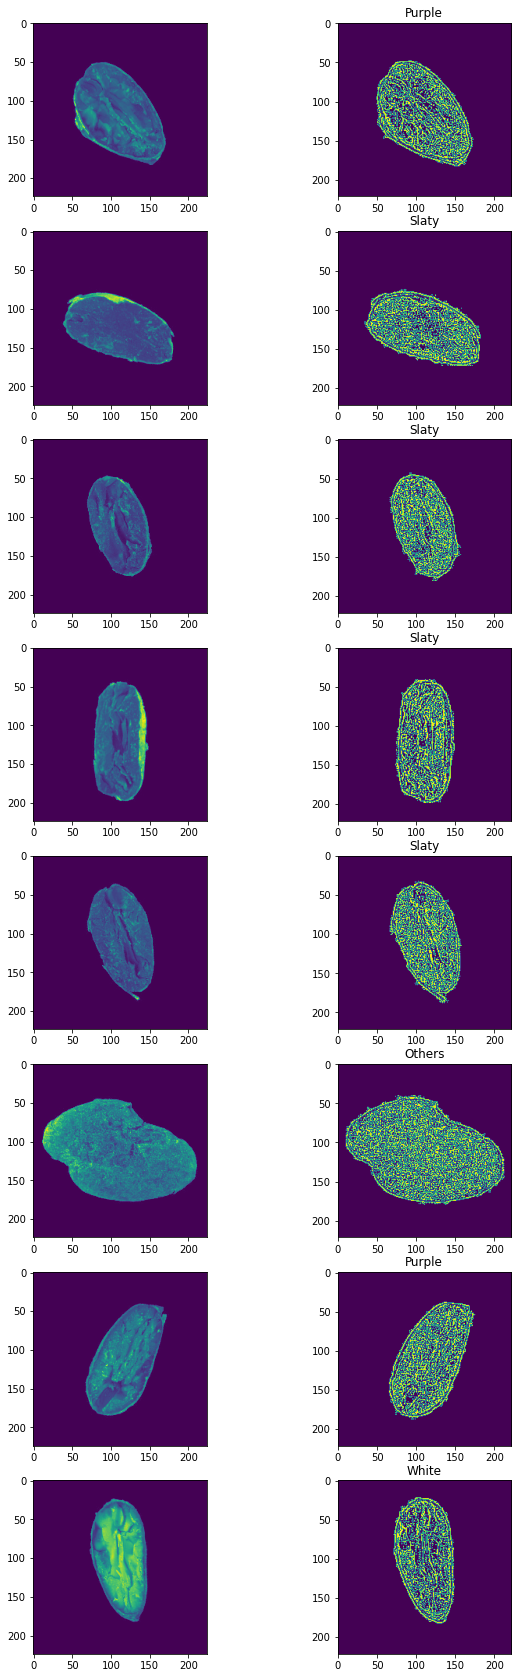

In [92]:
matplotlib.rcParams['figure.figsize'] = [10, 30]
i=0
for img_batch, lab_batch in test_ds.take(1):
    print(np.shape(img_batch))
    fed = model.predict_on_batch (img_batch)
    for k in range(batch_size):
        tt = classes[np.argmax(lab_batch[i])]
        # if (tt=="Slaty") or (tt=="Others") or (tt=="White"): 
        #     continue
        # else:
        plt.subplot(8,2,2*i+1)
        plt.imshow(np.asarray(img_batch[i].numpy(), dtype=np.uint8))
        plt.subplot(8,2,2*i+2)
        plt.imshow(np.asarray(fed[i], dtype=np.uint8))
        plt.title(tt)
        # print(tt)
        i=i+1